## Importando Dados e Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import datetime as dt

In [2]:
tabela = pd.read_csv("csv/historico_libertadores - partidas.csv")

In [3]:
tabela

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
0,Primeiro estágio,NaN,ter,2014-01-28,19:00 (21:00),Oriente Petrolero bo,1–0,uy Nacional,19.884,Estadio Ramón Aguilera Costas,Enrique Cáceres,Relatório da Partida,Jogo de ida/volta 1 de 2
1,Primeiro estágio,NaN,ter,2014-01-28,19:15 (23:15),Morelia mx,2–1,co Santa Fe,24.031,Estadio Generalísimo José María Morelos ...,Juan Soto,Relatório da Partida,Jogo de ida/volta 1 de 2
2,Primeiro estágio,NaN,qua,2014-01-29,19:00 (22:00),Sporting Cristal pe,2–1,br Atl Paranaense,23.752,Estadio Nacional,Enrique Osses,Relatório da Partida,Jogo de ida/volta 1 de 2
3,Primeiro estágio,NaN,qua,2014-01-29,19:00 (22:00),SD Quito ec,1–0,br Botafogo (RJ),4.123,Estadio Olímpico Atahualpa,Wilmar Roldán,Relatório da Partida,Jogo de ida/volta 1 de 2
4,Primeiro estágio,NaN,qui,2014-01-30,20:00 (21:00),Univ Chile cl,1–0,py Guaraní,34.569,Estadio Nacional Julio Martínez Prádanos,Martín Vázquez,Relatório da Partida,Jogo de ida/volta 1 de 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,Oitavas de final,NaN,qua,2023-08-09,19:00 (21:00),Independiente ec,NaN,co Pereira,NaN,Estadio Olímpico Atahualpa,NaN,Confronto,Jogo de ida/volta 2 de 2
1437,Oitavas de final,NaN,qua,2023-08-09,21:00,Boca Juniors ar,NaN,uy Nacional,NaN,Estadio Alberto José Armando,NaN,Confronto,Jogo de ida/volta 2 de 2
1438,Oitavas de final,NaN,qua,2023-08-09,21:30,Palmeiras br,NaN,br Atlético Mineiro,NaN,Allianz Parque,NaN,Confronto,Jogo de ida/volta 2 de 2
1439,Oitavas de final,NaN,qui,2023-08-10,20:00 (21:00),Olimpia py,NaN,br Flamengo,NaN,Estadio Manuel Ferreira,NaN,Confronto,Jogo de ida/volta 2 de 2


In [4]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rodada                1301 non-null   object
 1   Sem                   982 non-null    object
 2   Dia                   1301 non-null   object
 3   Data                  1301 non-null   object
 4   Horário               1301 non-null   object
 5   Em casa               1301 non-null   object
 6   Resultado             1285 non-null   object
 7   Visitante             1301 non-null   object
 8   Público               215 non-null    object
 9   Local                 1299 non-null   object
 10  Árbitro               1285 non-null   object
 11  Relatório da Partida  1301 non-null   object
 12  Notas                 339 non-null    object
dtypes: object(13)
memory usage: 146.5+ KB


--------
## Dicionário dos Dados
+ Rodada - Rodada ou fase do campeonato
+ Sem - Número da rodada da semana
+ Dia - Dia da semana
+ Data - Data do jogo
+ Horário - Horário do Jogo
+ Em casa - time anfitrião
+ *xG - Gols esperados (removido)*
+ Resultado - resultado final da partida
+ Visitante - time visitante
+ Público - número de pessoas que compareceram ao estádio
+ Local - local da partida
+ Árbitro - árbitro da partida
------------

# Tratamento e Limpeza dos Dados

------
## Linhas duplicadas

In [5]:
duplicadas = tabela[tabela.duplicated()]
duplicadas

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1390,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
1405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("# Linhas duplicadas não nulas")
len(duplicadas) - duplicadas.isnull().sum()

# Linhas duplicadas não nulas


Rodada                  21
Sem                     21
Dia                     21
Data                    21
Horário                 21
Em casa                 21
Resultado               21
Visitante               21
Público                 21
Local                   21
Árbitro                 21
Relatório da Partida    21
Notas                   21
dtype: int64

Muitos valores sem preenchimento, vamos remover e ver o que sobra.

In [7]:
duplicadas_nao_nulas = duplicadas.dropna()
duplicadas_nao_nulas

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
140,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
170,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
306,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
312,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
473,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
479,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
627,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
633,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
777,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
783,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas


#### Essas duplicadas não nulas, são simplistmente uma repetição do cabeçalho, portanto todas as linhas duplicadas são removiveis.

In [8]:
tabela_limpa = tabela.drop_duplicates()

------
## Valore Nulos

<Axes: >

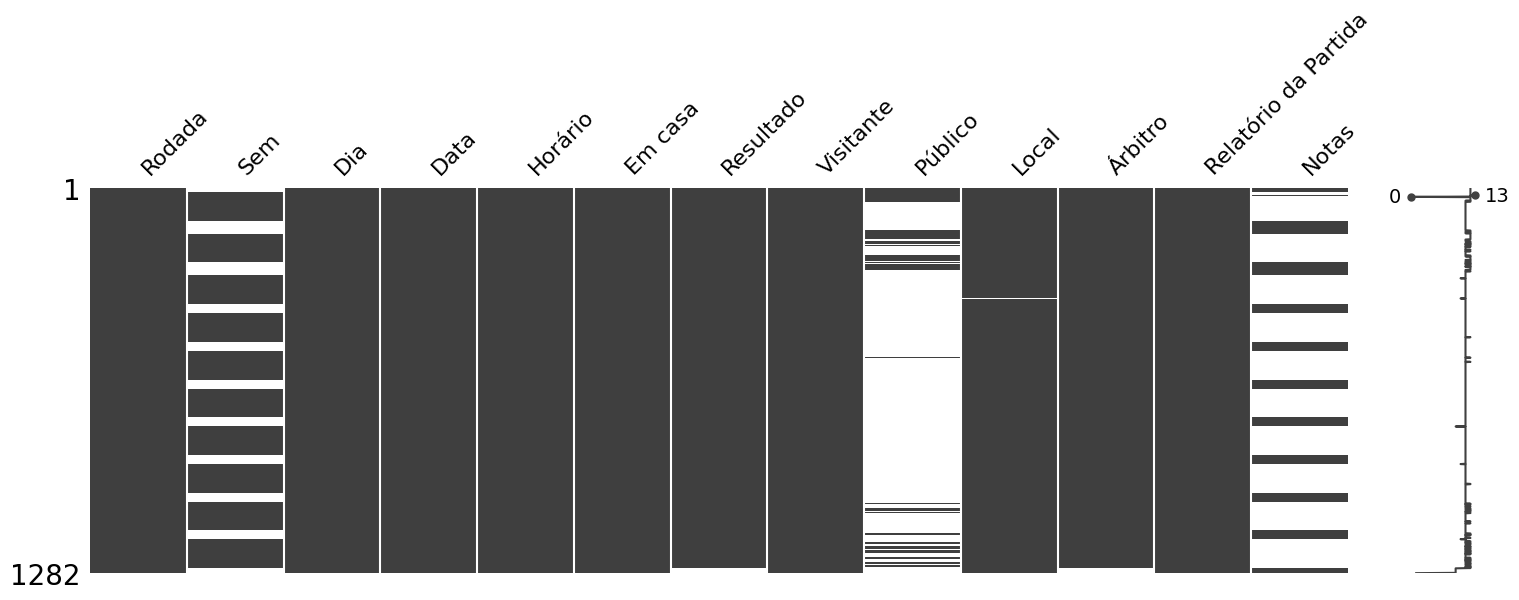

In [9]:
missingno.matrix(tabela_limpa, figsize=(18, 5))

In [10]:
tabela_limpa.isnull().sum()

Rodada                     2
Sem                      321
Dia                        2
Data                       2
Horário                    2
Em casa                    2
Resultado                 18
Visitante                  2
Público                 1088
Local                      4
Árbitro                   18
Relatório da Partida       2
Notas                    964
dtype: int64

Com a breve visão incial que tivemos da base, precebi que a última linha na verdade não era realicionada a nenhum jogo, então já vamos remove-la
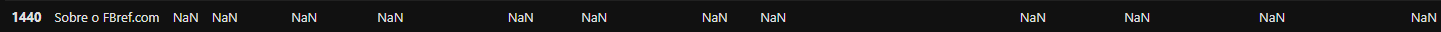

In [11]:
tabela_limpa = tabela_limpa.drop(index=1440)

### Rodada

In [12]:
tabela_limpa[tabela_limpa["Rodada"].isnull()]

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,NaN,NaN,sáb,2019-11-23,15:00 (17:00),Flamengo br,2–1,ar River Plate,NaN,Estadio Monumental (Campo neutro),Roberto Tobar,Relatório da Partida,NaN


Uma informação é totalmente nula e a outra não podemos tentar preencher. 

In [13]:
tabela_limpa[tabela_limpa["Data"] == "2019-11-23"]

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
915,Final,NaN,sáb,2019-11-23,15:00 (17:00),Flamengo br,2–1,ar River Plate,NaN,Estadio Monumental (Campo neutro),Roberto Tobar,Relatório da Partida,Jogo de ida/volta 2 de 2; Flamengo venceu
916,NaN,NaN,sáb,2019-11-23,15:00 (17:00),Flamengo br,2–1,ar River Plate,NaN,Estadio Monumental (Campo neutro),Roberto Tobar,Relatório da Partida,NaN


É apenas um informação duplicada, portanto vamos remover.

In [14]:
tabela_limpa = tabela_limpa.drop(index=[29, 916])

### Sem

#### Como as rodadas no futebol são contempladas durante uma semana, podemos preencher esses faltantes conforme a semana do jogo.

**Mas rodadas valem apenas para fase de grupos então devemos levar isso em consideração**

Vejamos quais "fases" existem na coluna **Rodada**:

In [15]:
tabela_limpa["Rodada"].value_counts()

Rodada
Estágio de grupos    576
Segunda fase         288
Oitavas de final     144
Group stage           96
Quartas de final      64
Primeiro estágio      36
Semifinais            32
Round of 16           16
Finais                10
Quarter-finals         8
Final                  4
Semi-finals            4
Rodada                 1
Name: count, dtype: int64

+ Como temos nomes em inglês e português para se referir a mesma coisa, vou traduzir tudo para português.
+ Modificaremos também primeira/segunda fase para
+ Romover linha com "Rodada"

In [16]:
tabela_limpa.loc[tabela_limpa["Rodada"] == "Rodada"]

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
24,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas


In [17]:
tabela_limpa = tabela_limpa.drop(index=tabela_limpa.loc[tabela_limpa["Rodada"] == "Rodada"].index)

In [18]:
traduzindo = {"Estágio de grupos": "Fase de Grupos", # do jeito conhecido
            "Group stage": "Fase de Grupos",
            "Primeiro estágio": "Fase de Grupos",
            "Segunda fase": "Fase de Grupos",
            "Round of 16": "Oitavas de final",
            "Quarter-finals": "Quartas de final",
            "Semi-finals": "Semifinais"             
             }

In [19]:
tabela_limpa_pt = tabela_limpa.copy()
tabela_limpa_pt.loc[:, "Rodada"] = tabela_limpa.loc[:, "Rodada"].replace(traduzindo)
tabela_limpa_pt["Rodada"].value_counts()

Rodada
Fase de Grupos      996
Oitavas de final    160
Quartas de final     72
Semifinais           36
Finais               10
Final                 4
Name: count, dtype: int64

#### Precisamos tratar as finais como uma só, isso passou a valer em 2019 pela Libertadores

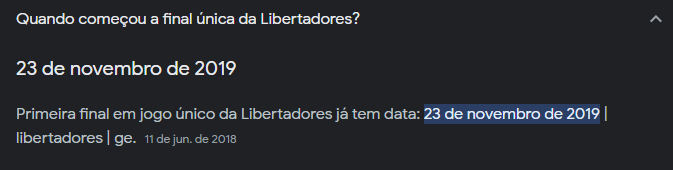

Então para as finais que tinham 2 jogos, vamos manter apenas o último jogo e atualizar as informações necessárias.

In [20]:
finais = tabela_limpa_pt.loc[(tabela_limpa_pt["Rodada"] == "Finais")]
finais

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
144,Finais,NaN,ter,2014-08-05,20:15 (21:15),Nacional py,1–1,ar San Lorenzo,NaN,Estadio Defensores del Chaco,Wilmar Roldán,Relatório da Partida,Jogo de ida/volta 1 de 2
145,Finais,NaN,ter,2014-08-12,22:15,San Lorenzo ar,1–0,py Nacional,NaN,Estadio Pedro Bidegaín,Sandro Ricci,Relatório da Partida,Jogo de ida/volta 2 de 2; San Lorenzo venceu
310,Finais,NaN,qua,2015-07-29,20:00 (22:00),UANL mx,0–0,ar River Plate,40.000,Estadio Universitario de Nuevo León,Antonio Arias,Relatório da Partida,Jogo de ida/volta 1 de 2
311,Finais,NaN,qua,2015-08-05,22:00,River Plate ar,3–0,mx UANL,69.000,Estadio Monumental Antonio Vespucio Libe...,Darío Ubríaco,Relatório da Partida,Jogo de ida/volta 2 de 2; River Plate venceu
477,Finais,NaN,qua,2016-07-20,19:45 (21:45),Independiente ec,1–1,co Nacional,NaN,Estadio Olímpico Atahualpa,Enrique Cáceres,Relatório da Partida,Jogo de ida/volta 1 de 2
478,Finais,NaN,qua,2016-07-27,19:45 (21:45),Nacional co,1–0,ec Independiente,NaN,Estadio Atanasio Girardot,Néstor Pitana,Relatório da Partida,Jogo de ida/volta 2 de 2; Nacional venceu
631,Finais,NaN,qua,2017-11-22,21:45,Grêmio br,1–0,ar Lanús,NaN,Arena do Grêmio,Julio Bascuñán,Relatório da Partida,Jogo de ida/volta 1 de 2
632,Finais,NaN,qua,2017-11-29,20:45 (21:45),Lanús ar,1–2,br Grêmio,NaN,Estadio Ciudad de Lanús,Enrique Cáceres,Relatório da Partida,Jogo de ida/volta 2 de 2; Grêmio venceu
781,Finais,NaN,dom,2018-11-11,16:00 (17:00),Boca Juniors ar,2–2,ar River Plate,NaN,Estadio Alberto José Armando,Roberto Tobar,Relatório da Partida,Jogo de ida/volta 1 de 2
782,Finais,NaN,dom,2018-12-09,20:30 (17:30),River Plate ar,3–1,ar Boca Juniors,NaN,Estadio Santiago Bernabéu (Campo neutro),Andrés Cunha,Relatório da Partida,Jogo de ida/volta 2 de 2; River Plate venceu; ...


In [21]:
# Libertadores 2014
finais.loc[145]["Resultado"] = '2-1'
# Libertadores 2015
# apenas no segundo jogo tiveram gols então não precisamos atualizar
# Libertadores 2016
finais.loc[478]["Resultado"] = '2-1'
# Libertadores 2017
finais.loc[632]["Resultado"] = '1-3'
# Libertadores 2018
finais.loc[782]["Resultado"] = '5-3'

In [22]:
finais_drop = [144, 310, 477, 631, 781]
finais_atualizar = [145, 311, 478, 632, 782]

tabela_limpa_pt = tabela_limpa_pt.drop(index=finais_drop)
tabela_limpa_pt.loc[finais_atualizar] = finais.loc[finais_atualizar]
tabela_limpa_pt.loc[finais_atualizar, "Rodada"] = "Final"

#### Voltando ao preenchimento da coluna Sem

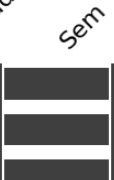

In [23]:
tabela_fase_grupos = tabela_limpa_pt.loc[tabela_limpa_pt["Rodada"] == "Fase de Grupos"]
tabela_fase_grupos[tabela_fase_grupos["Sem"].isnull()]

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Público,Local,Árbitro,Relatório da Partida,Notas
0,Fase de Grupos,NaN,ter,2014-01-28,19:00 (21:00),Oriente Petrolero bo,1–0,uy Nacional,19.884,Estadio Ramón Aguilera Costas,Enrique Cáceres,Relatório da Partida,Jogo de ida/volta 1 de 2
1,Fase de Grupos,NaN,ter,2014-01-28,19:15 (23:15),Morelia mx,2–1,co Santa Fe,24.031,Estadio Generalísimo José María Morelos ...,Juan Soto,Relatório da Partida,Jogo de ida/volta 1 de 2
2,Fase de Grupos,NaN,qua,2014-01-29,19:00 (22:00),Sporting Cristal pe,2–1,br Atl Paranaense,23.752,Estadio Nacional,Enrique Osses,Relatório da Partida,Jogo de ida/volta 1 de 2
3,Fase de Grupos,NaN,qua,2014-01-29,19:00 (22:00),SD Quito ec,1–0,br Botafogo (RJ),4.123,Estadio Olímpico Atahualpa,Wilmar Roldán,Relatório da Partida,Jogo de ida/volta 1 de 2
4,Fase de Grupos,NaN,qui,2014-01-30,20:00 (21:00),Univ Chile cl,1–0,py Guaraní,34.569,Estadio Nacional Julio Martínez Prádanos,Martín Vázquez,Relatório da Partida,Jogo de ida/volta 1 de 2
5,Fase de Grupos,NaN,qui,2014-01-30,20:45 (23:15),Caracas FC ve,0–2,ar Lanús,12.602,Estadio Olímpico,Víctor Carrillo,Relatório da Partida,Jogo de ida/volta 1 de 2
6,Fase de Grupos,NaN,ter,2014-02-04,21:00,Nacional uy,2–0,bo Oriente Petrolero,23.991,Estadio Gran Parque Central,Carlos Vera,Relatório da Partida,Jogo de ida/volta 2 de 2; Nacional venceu
7,Fase de Grupos,NaN,ter,2014-02-04,20:30 (23:30),Santa Fe co,1–0,mx Morelia,27.566,Estadio Nemesio Camacho El Campín,Raúl Orozco,Relatório da Partida,Jogo de ida/volta 2 de 2; Santa Fe venceu
8,Fase de Grupos,NaN,qui,2014-02-06,19:30 (20:30),Guaraní py,2–3,cl Univ Chile,4.410,Estadio Rogelio Lorenzo Livieres,Pablo Díaz,Relatório da Partida,Jogo de ida/volta 2 de 2; Univ Chile venceu
9,Fase de Grupos,NaN,qua,2014-02-05,22:00,Botafogo (RJ) br,4–0,ec SD Quito,45.154,Estadio Jornalista Mário Filho,Silvio Trucco,Relatório da Partida,Jogo de ida/volta 2 de 2; Botafogo (RJ) venceu


Podemos ver que os faltantes são na verdade 3 grupos em sequência, então basta descobrir em qual rodada foi ocorrida um dos jogos, que os demais é só completar igualmente.

#### Buscando as informações no Google encontrei
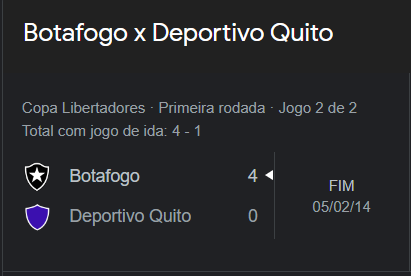 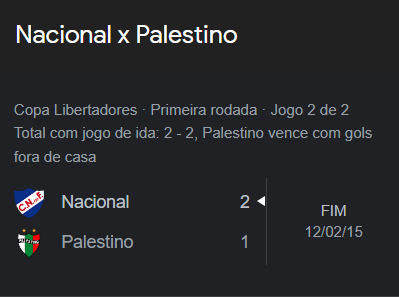 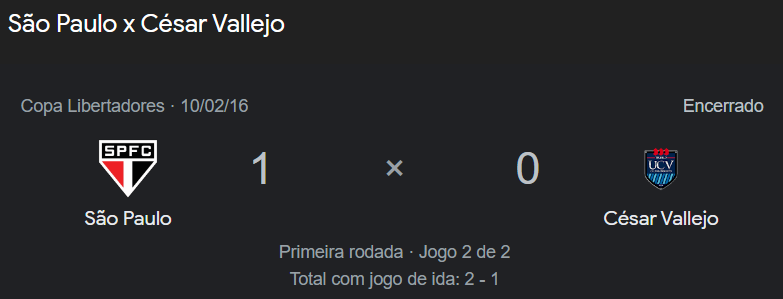

Todos são primeiras rodadas!

In [24]:
index_nulos_fase_grupo = tabela_fase_grupos[tabela_fase_grupos["Sem"].isnull()].index
tabela_limpa_pt_completa = tabela_limpa_pt.copy()
tabela_limpa_pt_completa.loc[index_nulos_fase_grupo, "Sem"] = 1

In [25]:
tabela_limpa_pt_completa.isnull().sum()

Rodada                     0
Sem                      277
Dia                        0
Data                       0
Horário                    0
Em casa                    0
Resultado                 16
Visitante                  0
Público                 1081
Local                      2
Árbitro                   16
Relatório da Partida       0
Notas                    961
dtype: int64

### Público e Notas

Por serem colunas quase por completas vazias vamos removê-las.

In [26]:
tabela_limpa_pt_completa = tabela_limpa_pt_completa.drop(columns=["Público", "Notas"])

### Resultado e Árbitro

In [27]:
tabela_limpa_pt_completa[tabela_limpa_pt_completa["Resultado"].isnull()]

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Local,Árbitro,Relatório da Partida
1423,Oitavas de final,NaN,ter,2023-08-01,19:00,Argentinos Jun ar,NaN,br Fluminense,Estadio Diego Armando Maradona,NaN,Confronto
1424,Oitavas de final,NaN,ter,2023-08-01,20:00 (21:00),Bolívar bo,NaN,br Atl Paranaense,Estadio Hernando Siles,NaN,Confronto
1425,Oitavas de final,NaN,ter,2023-08-01,21:00,River Plate ar,NaN,br Internacional,Estadio Mâs Monumental,NaN,Confronto
1427,Oitavas de final,NaN,qui,2023-08-03,17:00 (19:00),Nacional co,NaN,ar Racing Club,Estadio Atanasio Girardot,NaN,Confronto
1428,Oitavas de final,NaN,qua,2023-08-02,19:00 (21:00),Pereira co,NaN,ec Independiente,Estadio Hernán Ramírez Villegas,NaN,Confronto
1429,Oitavas de final,NaN,qua,2023-08-02,21:00,Nacional uy,NaN,ar Boca Juniors,Estadio Gran Parque Central,NaN,Confronto
1430,Oitavas de final,NaN,qua,2023-08-02,21:30,Atlético Mineiro br,NaN,br Palmeiras,Estádio Governador Magalhães Pinto,NaN,Confronto
1431,Oitavas de final,NaN,qui,2023-08-03,21:00,Flamengo br,NaN,py Olimpia,Estadio Jornalista Mário Filho,NaN,Confronto
1432,Oitavas de final,NaN,ter,2023-08-08,19:00,Fluminense br,NaN,ar Argentinos Jun,Estadio Jornalista Mário Filho,NaN,Confronto
1433,Oitavas de final,NaN,ter,2023-08-08,21:00,Internacional br,NaN,ar River Plate,Estádio José Pinheiro Borba,NaN,Confronto


### Esses são exatamente os próximos jogos que serão disputados no mata-mata da Libertadores 2023, então devemos separá-los.

**Mas antes**, algumas transformações para facilitar nossa vida depois.

--------
## Alguns ajustes de formatos e disposições

### Data em datetime

In [28]:
data = tabela_limpa_pt_completa.copy()

In [29]:
data["Data"] = pd.to_datetime(data["Data"])

### Em Casa e Visitante
Nessas duas colunas os nomes dos times vem com a nacionalidade acompanhada, vamos separar essas informações para ajudar depois na análise exploratória dos dados.

#### Em Casa

In [30]:
em_casa = data["Em casa"]
em_casa

0       Oriente Petrolero bo
1                 Morelia mx
2        Sporting Cristal pe
3                SD Quito ec
4              Univ Chile cl
                ...         
1435          Racing Club ar
1436        Independiente ec
1437         Boca Juniors ar
1438            Palmeiras br
1439              Olimpia py
Name: Em casa, Length: 1273, dtype: object

Portanto as duas últimas letras se referem a nacionalidade da equipe que joga em casa.

In [31]:
data["Casa"] = em_casa.apply(lambda x: str(x)[:-3]) # removendo espaço + abreviação
data["Nacionalidade Casa"] = em_casa.apply(lambda x: x.split(" ")[-1]) # mantendo abreviação da nacionalidade

In [32]:
data

,Rodada,Sem,Dia,Data,Horário,Em casa,Resultado,Visitante,Local,Árbitro,Relatório da Partida,Casa,Nacionalidade Casa
0,Fase de Grupos,1,ter,2014-01-28,19:00 (21:00),Oriente Petrolero bo,1–0,uy Nacional,Estadio Ramón Aguilera Costas,Enrique Cáceres,Relatório da Partida,Oriente Petrolero,bo
1,Fase de Grupos,1,ter,2014-01-28,19:15 (23:15),Morelia mx,2–1,co Santa Fe,Estadio Generalísimo José María Morelos ...,Juan Soto,Relatório da Partida,Morelia,mx
2,Fase de Grupos,1,qua,2014-01-29,19:00 (22:00),Sporting Cristal pe,2–1,br Atl Paranaense,Estadio Nacional,Enrique Osses,Relatório da Partida,Sporting Cristal,pe
3,Fase de Grupos,1,qua,2014-01-29,19:00 (22:00),SD Quito ec,1–0,br Botafogo (RJ),Estadio Olímpico Atahualpa,Wilmar Roldán,Relatório da Partida,SD Quito,ec
4,Fase de Grupos,1,qui,2014-01-30,20:00 (21:00),Univ Chile cl,1–0,py Guaraní,Estadio Nacional Julio Martínez Prádanos,Martín Vázquez,Relatório da Partida,Univ Chile,cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Oitavas de final,NaN,qui,2023-08-10,19:00,Racing Club ar,NaN,co Nacional,Estadio Presidente Juan Domingo Perón,NaN,Confronto,Racing Club,ar
1436,Oitavas de final,NaN,qua,2023-08-09,19:00 (21:00),Independiente ec,NaN,co Pereira,Estadio Olímpico Atahualpa,NaN,Confronto,Independiente,ec
1437,Oitavas de final,NaN,qua,2023-08-09,21:00,Boca Juniors ar,NaN,uy Nacional,Estadio Alberto José Armando,NaN,Confronto,Boca Juniors,ar
1438,Oitavas de final,NaN,qua,2023-08-09,21:30,Palmeiras br,NaN,br Atlético Mineiro,Allianz Parque,NaN,Confronto,Palmeiras,br


In [33]:
data = data.drop(columns="Em casa")

#### Visitante

In [34]:
visitante = data["Visitante"]
visitante

0               uy Nacional
1               co Santa Fe
2         br Atl Paranaense
3          br Botafogo (RJ)
4                py Guaraní
               ...         
1435            co Nacional
1436             co Pereira
1437            uy Nacional
1438    br Atlético Mineiro
1439            br Flamengo
Name: Visitante, Length: 1273, dtype: object

Segue a mesma lógica, mas com a nacionalidade registrada a esquerda

In [35]:
data["Visitante"] = visitante.apply(lambda x: str(x)[3:]) # removendo espaço + abreviação
data["Nacionalidade Visitante"] = visitante.apply(lambda x: x.split(" ")[0]) # mantendo abreviação da nacionalidade

In [36]:
data

,Rodada,Sem,Dia,Data,Horário,Resultado,Visitante,Local,Árbitro,Relatório da Partida,Casa,Nacionalidade Casa,Nacionalidade Visitante
0,Fase de Grupos,1,ter,2014-01-28,19:00 (21:00),1–0,Nacional,Estadio Ramón Aguilera Costas,Enrique Cáceres,Relatório da Partida,Oriente Petrolero,bo,uy
1,Fase de Grupos,1,ter,2014-01-28,19:15 (23:15),2–1,Santa Fe,Estadio Generalísimo José María Morelos ...,Juan Soto,Relatório da Partida,Morelia,mx,co
2,Fase de Grupos,1,qua,2014-01-29,19:00 (22:00),2–1,Atl Paranaense,Estadio Nacional,Enrique Osses,Relatório da Partida,Sporting Cristal,pe,br
3,Fase de Grupos,1,qua,2014-01-29,19:00 (22:00),1–0,Botafogo (RJ),Estadio Olímpico Atahualpa,Wilmar Roldán,Relatório da Partida,SD Quito,ec,br
4,Fase de Grupos,1,qui,2014-01-30,20:00 (21:00),1–0,Guaraní,Estadio Nacional Julio Martínez Prádanos,Martín Vázquez,Relatório da Partida,Univ Chile,cl,py
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Oitavas de final,NaN,qui,2023-08-10,19:00,NaN,Nacional,Estadio Presidente Juan Domingo Perón,NaN,Confronto,Racing Club,ar,co
1436,Oitavas de final,NaN,qua,2023-08-09,19:00 (21:00),NaN,Pereira,Estadio Olímpico Atahualpa,NaN,Confronto,Independiente,ec,co
1437,Oitavas de final,NaN,qua,2023-08-09,21:00,NaN,Nacional,Estadio Alberto José Armando,NaN,Confronto,Boca Juniors,ar,uy
1438,Oitavas de final,NaN,qua,2023-08-09,21:30,NaN,Atlético Mineiro,Allianz Parque,NaN,Confronto,Palmeiras,br,br


In [37]:
data["Nacionalidade Casa"].unique()

array(['bo', 'mx', 'pe', 'ec', 'cl', 've', 'uy', 'co', 'py', 'br', 'ar'],
      dtype=object)

### Removendo colunas Relatório da Partida, Local, Dia e Horário 
Analisando aqui a tabela proveniente do site, vi qeu a coluna "Relatório da Partida" é composta por links que direcionam a páginas dos jogos, com informações gerais do que ocorreu na partida. Por agora vou removê-la, mas provavelmente aqui pode ser um local para enriquecermos fortemente os dados para a modelagem.

Já para as variáveis "Local", "Dia" e "Horário" é relativo ao estádio e data-hora que ocorreram os jogos, não vai nos ajudar em muita coisa.

In [38]:
data = data.drop(columns=["Relatório da Partida", "Local", "Dia", "Horário"])

#### Data -> Edição

In [39]:
data["Edicao"] = data["Data"].dt.year

In [40]:
data = data.reindex(columns=["Rodada", "Data", "Sem", "Edicao", "Casa", "Visitante", "Nacionalidade Casa", "Nacionalidade Visitante", "Resultado"])

In [41]:
data

,Rodada,Data,Sem,Edicao,Casa,Visitante,Nacionalidade Casa,Nacionalidade Visitante,Resultado
0,Fase de Grupos,2014-01-28,1,2014,Oriente Petrolero,Nacional,bo,uy,1–0
1,Fase de Grupos,2014-01-28,1,2014,Morelia,Santa Fe,mx,co,2–1
2,Fase de Grupos,2014-01-29,1,2014,Sporting Cristal,Atl Paranaense,pe,br,2–1
3,Fase de Grupos,2014-01-29,1,2014,SD Quito,Botafogo (RJ),ec,br,1–0
4,Fase de Grupos,2014-01-30,1,2014,Univ Chile,Guaraní,cl,py,1–0
...,...,...,...,...,...,...,...,...,...
1435,Oitavas de final,2023-08-10,NaN,2023,Racing Club,Nacional,ar,co,NaN
1436,Oitavas de final,2023-08-09,NaN,2023,Independiente,Pereira,ec,co,NaN
1437,Oitavas de final,2023-08-09,NaN,2023,Boca Juniors,Nacional,ar,uy,NaN
1438,Oitavas de final,2023-08-09,NaN,2023,Palmeiras,Atlético Mineiro,br,br,NaN


### Resultado

Os resultados do jeito qeu estão não será interpretável para o modelo pois está alocando duas informações em uma única célula, temos que separar esses dados em Gols Time Casa e Gols Time Visitante.

**Mas antes, vamos separar os dados que queremos prever.**

In [42]:
jogos_futuros = data.loc[data["Resultado"].isnull()]
jogos_futuros.to_csv("csv/jogos_para_prever.csv", index=False)

In [43]:
data_treinamento = data.drop(index=jogos_futuros.index)

In [44]:
data_treinamento["Resultado"].value_counts()

Resultado
1–0            152
1–1            138
2–0            116
2–1            110
0–1             97
              ... 
5–3              1
(4) 1–0 (5)      1
(4) 1–0 (3)      1
(3) 2–1 (5)      1
(6) 0–0 (5)      1
Name: count, Length: 64, dtype: int64

#### Temos jogos em que o resultado foi decidido nos pênaltis, devemos levar isso em consideração.

In [45]:
len_resultado = data_treinamento["Resultado"].apply(lambda x: len(x))
len_resultado.value_counts()

Resultado
3     1238
11      19
Name: count, dtype: int64

In [46]:
decisoes_penaltis = data_treinamento[len_resultado == 11]
decisoes_penaltis["Resultado"]

10      (5) 2–1 (4)
125     (4) 2–0 (2)
130     (2) 1–0 (4)
291     (4) 1–0 (3)
468     (4) 1–1 (3)
471     (3) 2–1 (5)
615     (4) 1–0 (5)
616     (5) 0–1 (4)
625     (4) 2–0 (3)
763     (5) 2–1 (3)
894     (2) 0–0 (4)
899     (4) 2–0 (2)
1031    (4) 0–0 (2)
1032    (3) 1–1 (5)
1038    (5) 0–1 (4)
1162    (3) 0–0 (1)
1168    (4) 0–0 (5)
1300    (5) 0–0 (6)
1310    (6) 0–0 (5)
Name: Resultado, dtype: object

In [47]:
dict_vitoria_penaltis = {
10  :  [1, 2, 1],  #(5) 2–1 (4)
125 :  [1, 2, 0],  #(4) 2–0 (2)
130 :  [-1, 1, 0],  #(2) 1–0 (4)
291 :  [1, 1, 0],  #(4) 1–0 (3)
468 :  [1, 1, 1],  #(4) 1–1 (3)
471 :  [-1, 2, 1],  #(3) 2–1 (5)
615 :  [-1, 1, 0],  #(4) 1–0 (5)
616 :  [1, 0, 1],  #(5) 0–1 (4)
625 :  [1, 2, 0],  #(4) 2–0 (3)
763 :  [1, 2, 1],  #(5) 2–1 (3)
894 :  [-1, 0, 0],  #(2) 0–0 (4)
899 :  [1, 2, 0],  #(4) 2–0 (2)
1031:  [1, 0, 0],  #(4) 0–0 (2)
1032:  [-1, 1, 1],  #(3) 1–1 (5)
1038:  [1, 0, 1],  #(5) 0–1 (4)
1162:  [1, 0, 0],  #(3) 0–0 (1)
1168:  [-1, 0, 0],  #(4) 0–0 (5)
1300:  [-1, 0, 0],  #(5) 0–0 (6)
1310:  [1, 0, 0]   #(6) 0–0 (5)
}

In [48]:
resultado_sem_penaltis = decisoes_penaltis["Resultado"].apply(lambda x: x.split(" ")[1])
data_treinamento.loc[resultado_sem_penaltis.index, "Resultado"] = resultado_sem_penaltis

#### Depois de algum tempo, percebi que na coluna resultados, existem dois tipos de "-" diferentes, então usaremos dois métodos apply em sequência

In [49]:
data_treinamento["Gols Casa"] = data_treinamento["Resultado"].apply(lambda x: x.split("–")[0]).apply(lambda x: x.split("-")[0])
data_treinamento["Gols Visitante"] = data_treinamento["Resultado"].apply(lambda x: x.split("–")[-1]).apply(lambda x: x.split("-")[-1])

In [50]:
data_treinamento["Gols Casa"].value_counts()

Gols Casa
1    382
2    307
0    296
3    143
4     84
5     28
6      9
8      4
7      4
Name: count, dtype: int64

## Novo Resultado
+ se Casa ganhou : 1
+ se Casa perdeu : -1
+ se empate : 0

In [51]:
data_treinamento.loc[(data_treinamento["Gols Casa"] > data_treinamento["Gols Visitante"]), "Resultado"] = 1
data_treinamento.loc[(data_treinamento["Gols Casa"] < data_treinamento["Gols Visitante"]), "Resultado"] = -1
data_treinamento.loc[(data_treinamento["Gols Casa"] == data_treinamento["Gols Visitante"]), "Resultado"] = 0

In [52]:
data_treinamento["Resultado"].value_counts()

Resultado
1     651
-1    312
0     294
Name: count, dtype: int64

In [53]:
# atualiando resultados
for idx in dict_vitoria_penaltis.keys():
    data_treinamento.loc[idx, "Resultado"] = dict_vitoria_penaltis[idx][0]
    data_treinamento.loc[idx, "Gols Casa"] = dict_vitoria_penaltis[idx][1]
    data_treinamento.loc[idx, "Gols Visitante"] = dict_vitoria_penaltis[idx][2]

#### Assim, podemos partir para análise exploratória

In [54]:
data_treinamento.to_csv("csv/treinamento.csv", index=False)